In [1]:
from qiskit import *
from qiskit.dagcircuit import DAGCircuit
from qiskit.tools.visualization import *
import networkx as nx

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CXCancellation, CommutationTransformation, CommutationAnalysis, GateAnalysis, FixedPoint

/home/syoon/Code/qiskit-terra/qiskit/tools/visualization/_circuit_visualization.py:185: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


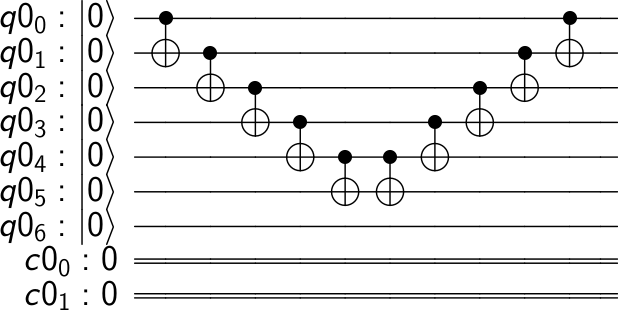

In [2]:
q = QuantumRegister(7)
c = ClassicalRegister(2)
circ = QuantumCircuit(q, c)
circ.cx(q[0], q[1])
circ.cx(q[1], q[2])
circ.cx(q[2], q[3])
circ.cx(q[3], q[4])
circ.cx(q[4], q[5])
circ.cx(q[4], q[5])
circ.cx(q[3], q[4])
circ.cx(q[2], q[3])
circ.cx(q[1], q[2])
circ.cx(q[0], q[1])
circuit_drawer(circ)

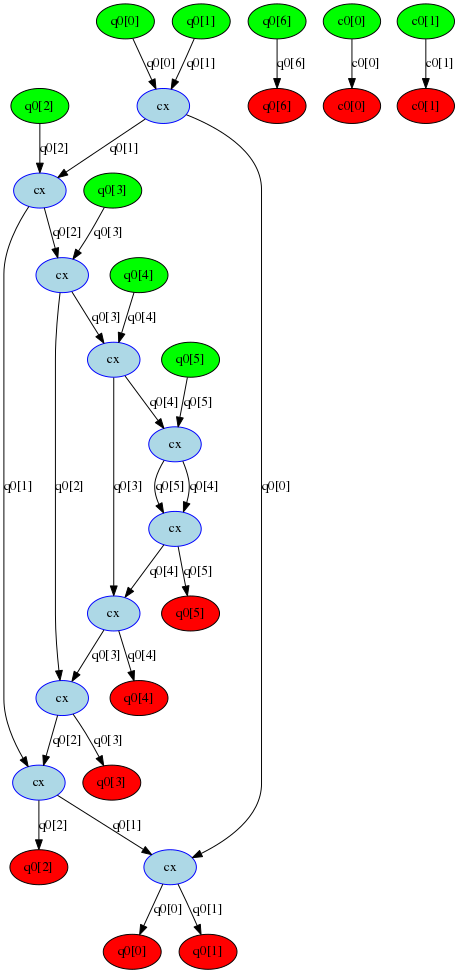

In [3]:
#DAG
qdag = DAGCircuit.fromQuantumCircuit(circ)
#print(qdag.basis)

#print(qdag.qregs)
#print(qdag.gates)
#print(qdag.num_tensor_factors())
#print(qdag.wire_type)
#print(qdag.collect_runs(["cx"]))
dag_drawer(qdag)

In [4]:
# NX Multigraph

topo_order = list(nx.topological_sort(qdag.multi_graph)) 
for node in topo_order:
    if qdag.multi_graph.node[node]["type"] == "op":
        
        print(qdag.multi_graph.node[node]["qargs"], qdag.multi_graph.node[node].keys())
    print(node)
    print(qdag.multi_graph.node[node]["name"], qdag.multi_graph.node[node].keys())

print(qdag.multi_graph.node[22]['name'], qdag.multi_graph.node[22]['type'])
#print(CommutationAnalysis.commute(qdag.multi_graph.node[23], qdag.multi_graph.node[27]))
print(qdag.multi_graph.node[2].keys())

for pred in qdag.multi_graph.predecessors(21):
    print(pred)


17
('c0', 1) dict_keys(['name', 'type'])
18
('c0', 1) dict_keys(['name', 'type'])
15
('c0', 0) dict_keys(['name', 'type'])
16
('c0', 0) dict_keys(['name', 'type'])
13
('q0', 6) dict_keys(['name', 'type'])
14
('q0', 6) dict_keys(['name', 'type'])
11
('q0', 5) dict_keys(['name', 'type'])
9
('q0', 4) dict_keys(['name', 'type'])
7
('q0', 3) dict_keys(['name', 'type'])
5
('q0', 2) dict_keys(['name', 'type'])
3
('q0', 1) dict_keys(['name', 'type'])
1
('q0', 0) dict_keys(['name', 'type'])
[('q0', 0), ('q0', 1)] dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
19
cx dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
[('q0', 1), ('q0', 2)] dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
20
cx dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
[('q0', 2), ('q0', 3)] dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
21
cx dict_keys(['condition', 'name', 'qargs', 'type', 'cargs', 'params'])
[('q0', 3), 

In [5]:
pm = PassManager()
pm.add_passes(GateAnalysis())
pm.add_passes(FixedPoint('gate_count'))
pm.add_passes([CXCancellation(), GateAnalysis(), FixedPoint('gate_count')],\
              do_while = lambda property_set: not property_set['fixed_point']['gate_count'])
# pm.add_passes(CommutationAnalysis())
# pm.add_passes(CommutationTransformation())

gate count 28
previous_value None
current value 28
gate count 26
previous_value 28
current value 26
gate count 24
previous_value 26
current value 24
gate count 22
previous_value 24
current value 22
gate count 20
previous_value 22
current value 20
gate count 18
previous_value 20
current value 18
gate count 18
previous_value 18
current value 18


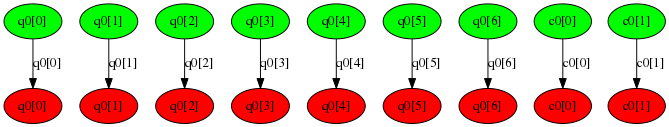

In [6]:
from qiskit.transpiler import transpile
qdag = transpile(qdag, pass_manager=pm)
dag_drawer(qdag)